In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = r"/content/drive/MyDrive/UNIR - Master en Inteligencia de Negocio/Fundamentos de Visualización para el Análisis de Datos/Actividades_Fundamentos_Visualizacion/FUND VISUALIZ ANÁLISIS DATOS/ACTIVIDAD 1 (17.11.2025)/Incarceration_by_Country__Clean_.csv"

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Opciones generales de visualización
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 10


Mounted at /content/drive


In [3]:
# 1. Cargar CSV
df = pd.read_csv(data)

# 2. Calcular % de la población presa mundial (world_share)
df["world_share"] = (
    df["estimated_prison_population"]
    / df["estimated_prison_population"].sum()
    * 100
)

# 3. Ordenar por tasa de encarcelación (de mayor a menor)
df = df.sort_values(
    "incarceration_rate_per_100k",
    ascending=False
).reset_index(drop=True)

# 4. Crear ranking por tasa (1 = país con mayor tasa)
df["rank_rate"] = df.index + 1

df.head()


,rank,country,flag,incarceration_rate_per_100k,estimated_prison_population,world_share,rank_rate
0,33,El Salvador,🇸🇻,1086,51758,0.655462,1
1,21,Cuba,🇨🇺,794,73846,0.935184,2
2,29,Rwanda,🇷🇼,637,56885,0.720391,3
3,2,United States,🇺🇸,614,1726496,21.864313,4
4,3,Brazil,🇧🇷,390,664204,8.411467,5


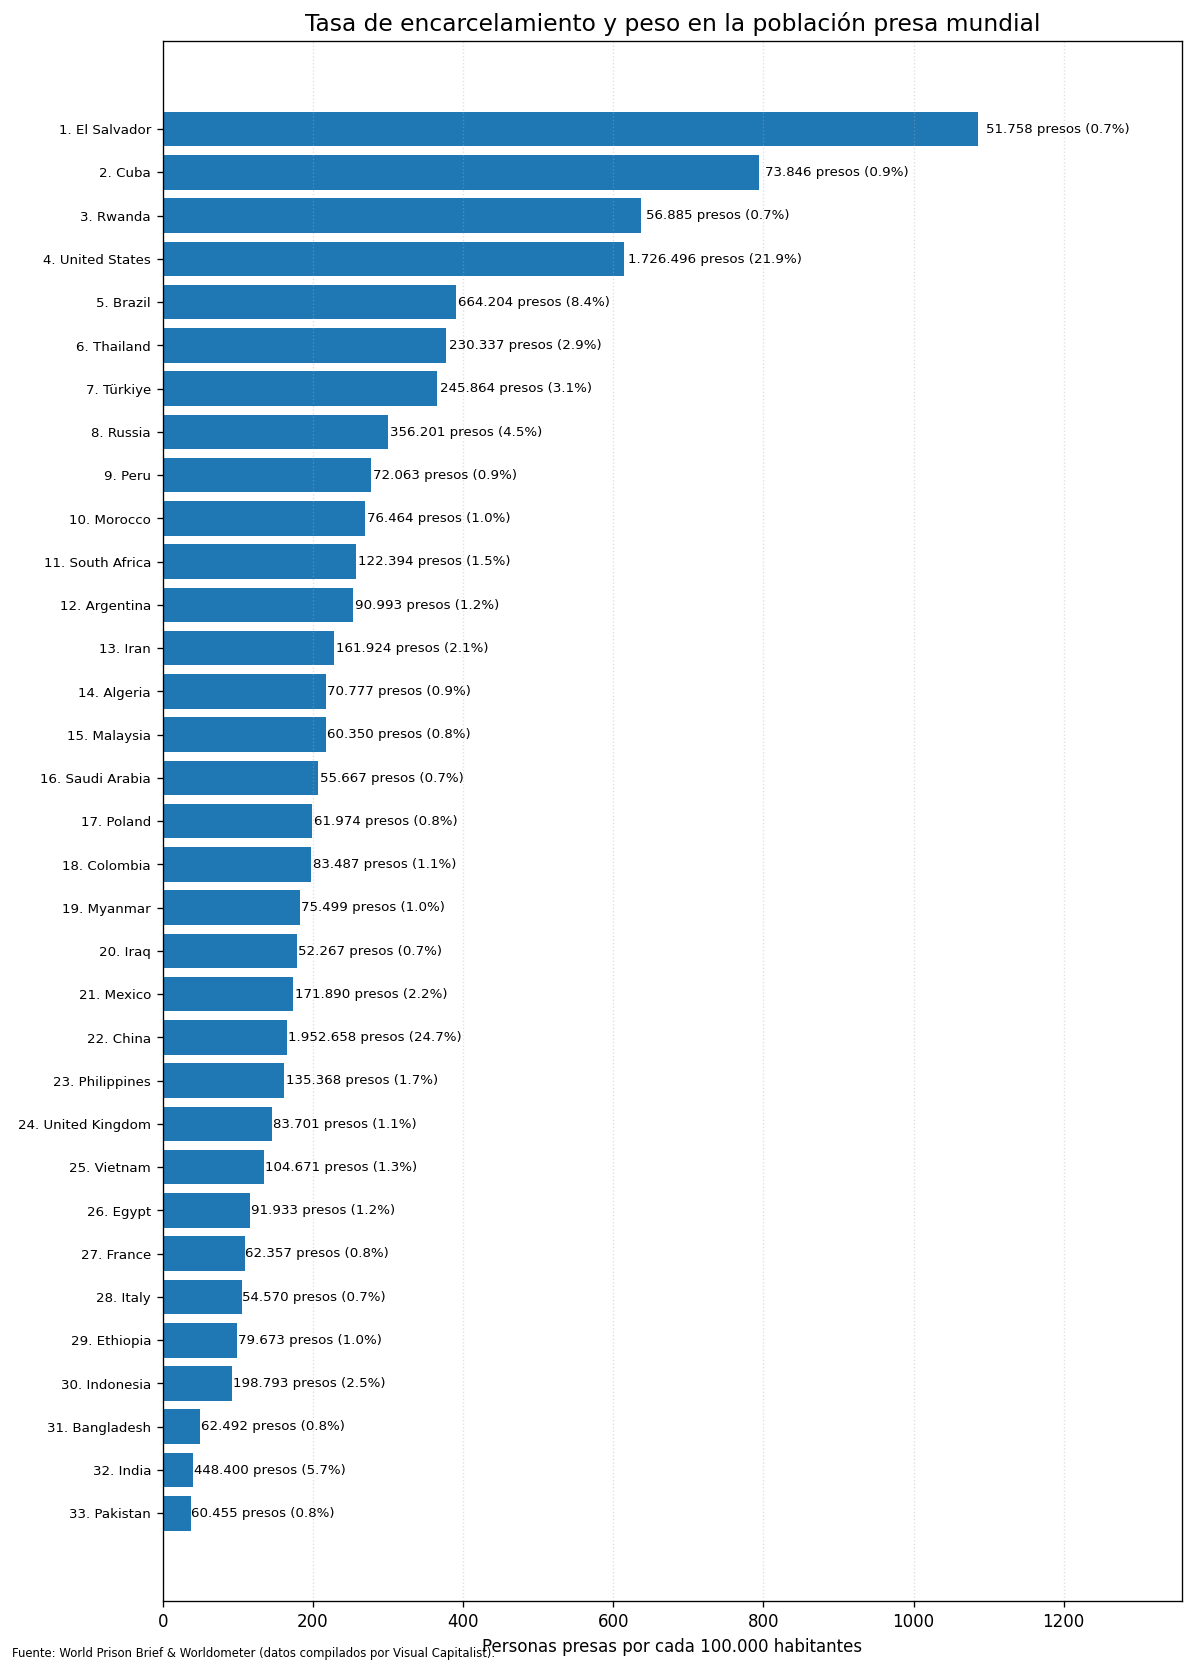

In [4]:
# --- GRÁFICO DE BARRAS HORIZONTAL ---

fig, ax = plt.subplots(figsize=(10, 14))

# Etiquetas del eje Y: "1. El Salvador", etc.
y_labels = [
    f"{rank}. {country}"
    for rank, country in zip(df["rank_rate"], df["country"])
]

# Eje X = tasa de encarcelamiento
x_values = df["incarceration_rate_per_100k"]

ax.barh(y_labels, x_values)

# Queremos el país con mayor tasa arriba
ax.invert_yaxis()

# Dejar espacio a la derecha para las etiquetas de texto
ax.set_xlim(0, x_values.max() * 1.25)

# Títulos y etiquetas
ax.set_xlabel("Personas presas por cada 100.000 habitantes")
ax.set_title(
    "Tasa de encarcelamiento y peso en la población presa mundial",
    fontsize=14
)

# Grid ligero en el eje X para facilitar lectura
ax.grid(axis="x", linestyle=":", alpha=0.4)
ax.tick_params(axis="y", labelsize=8)

# Añadir etiquetas de población total y % mundial al final de cada barra
for i, row in df.iterrows():
    rate = row["incarceration_rate_per_100k"]
    total = row["estimated_prison_population"]
    share = row["world_share"]

    total_str = f"{total:,.0f}".replace(",", ".")

    text = f"{total_str} presos ({share:.1f}%)"
    ax.text(
        rate * 1.01,   # un poco a la derecha del final de la barra
        i,
        text,
        va="center",
        fontsize=8
    )

# Nota de fuente en la parte inferior
fig.text(
    0.01, 0.01,
    "Fuente: World Prison Brief & Worldometer (datos compilados por Visual Capitalist).",
    ha="left",
    fontsize=7
)

plt.tight_layout()

# Guardar la figura para usarla en la infografía
fig.savefig(
    "grafico_barras_tasa_encarcelamiento.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


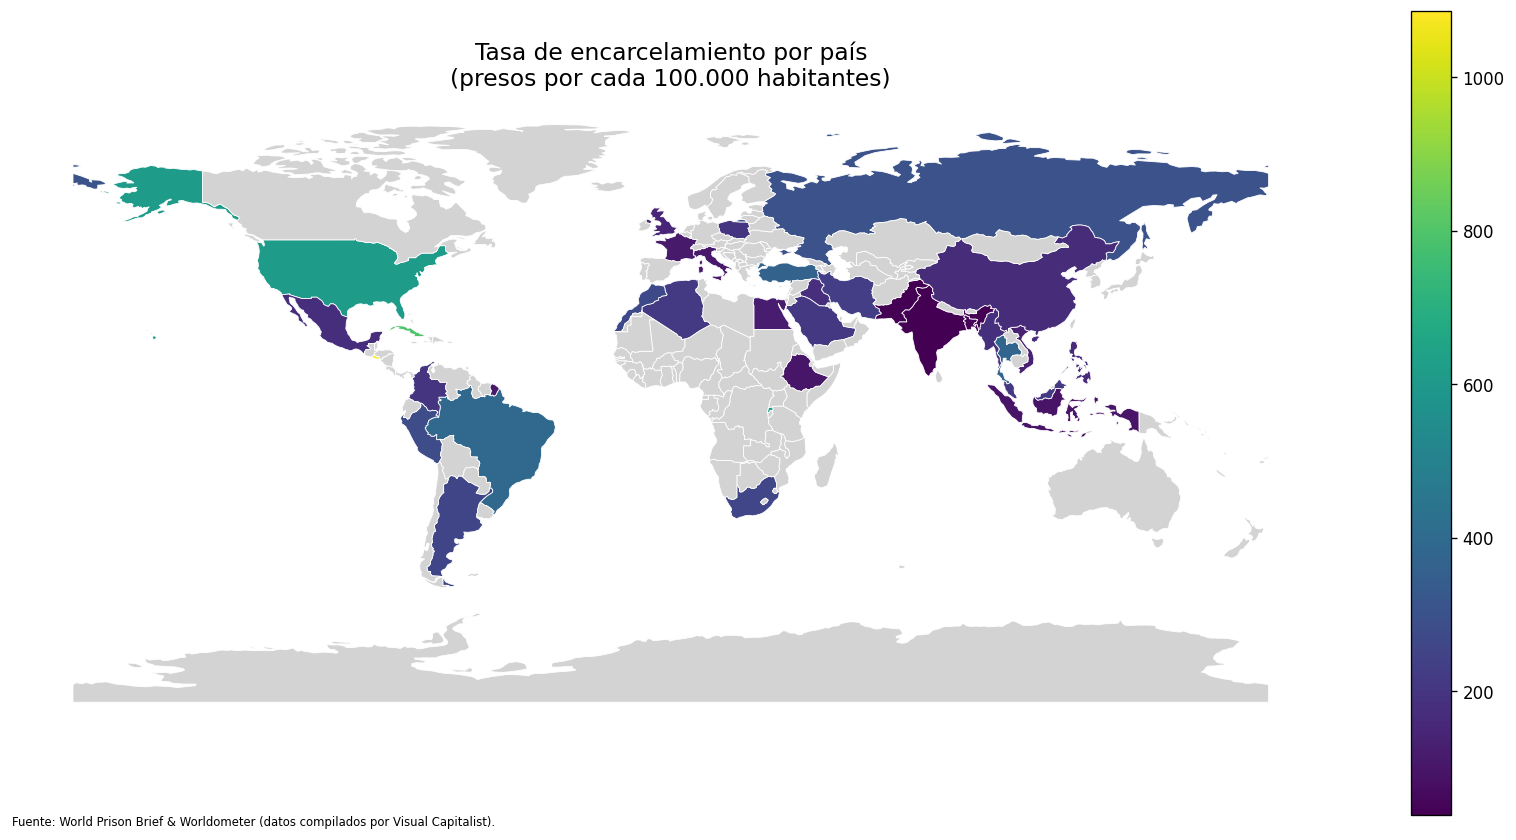

In [5]:
# --- MAPA COROPLÉTICO ---

# 1. Cargar geometría del mundo (Natural Earth)
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

# 2. Resolver diferencias de nombre entre nuestro CSV y el shapefile
name_map = {
    "United States": "United States of America",
    "Türkiye": "Turkey",
}

df["country_for_merge"] = df["country"].replace(name_map)

# 3. Unir datos de df a la geometría por nombre de país
gdf = world.merge(
    df,
    left_on="NAME",
    right_on="country_for_merge",
    how="left"
)

# 4. Dibujar mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

gdf.plot(
    column="incarceration_rate_per_100k",
    linewidth=0.5,
    ax=ax,
    edgecolor="white",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin datos"
    }
)

ax.set_title(
    "Tasa de encarcelamiento por país\n(presos por cada 100.000 habitantes)",
    fontsize=14
)
ax.set_axis_off()

# Nota de fuente
fig.text(
    0.01, 0.01,
    "Fuente: World Prison Brief & Worldometer (datos compilados por Visual Capitalist).",
    ha="left",
    fontsize=7
)

plt.tight_layout()

fig.savefig(
    "mapa_tasa_encarcelamiento.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


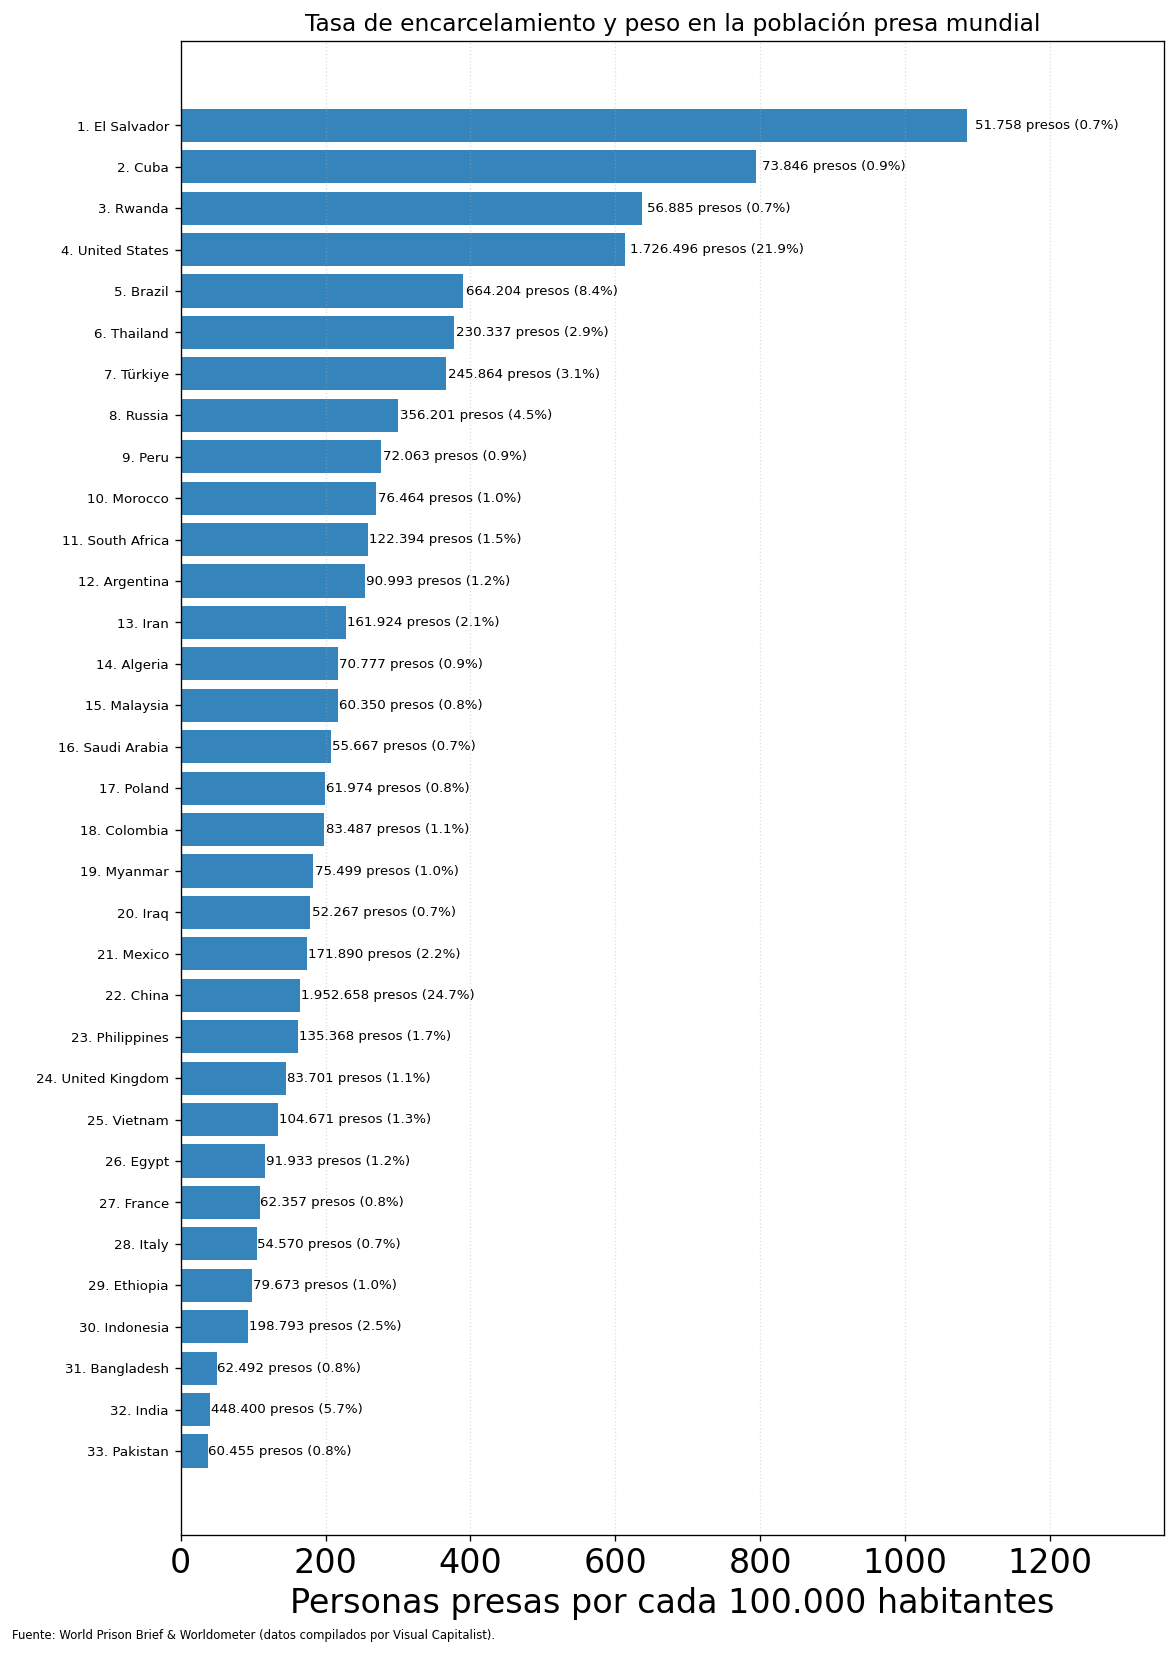

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a tu CSV (ajústala si lo tienes en otra carpeta)
data = r"/content/drive/MyDrive/UNIR - Master en Inteligencia de Negocio/Fundamentos de Visualización para el Análisis de Datos/Actividades_Fundamentos_Visualizacion/FUND VISUALIZ ANÁLISIS DATOS/ACTIVIDAD 1 (17.11.2025)/Incarceration_by_Country__Clean_.csv"

df = pd.read_csv(data)

# Asumo estos nombres de columna según lo que hemos usado:
# 'country', 'incarceration_rate_per_100k', 'estimated_prison_population'
rate_col = "incarceration_rate_per_100k"
total_col = "estimated_prison_population"
country_col = "country"

# Calcular % de población presa mundial y ranking
df["world_share"] = df[total_col] / df[total_col].sum() * 100
df = df.sort_values(rate_col, ascending=False).reset_index(drop=True)
df["rank_rate"] = df.index + 1

plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(figsize=(10, 14))

# Etiquetas: "1. El Salvador", etc.
y_labels = [
    f"{rank}. {country}"
    for rank, country in zip(df["rank_rate"], df[country_col])
]
x_values = df[rate_col]

# Barras horizontales
ax.barh(y_labels, x_values, alpha=0.9)  # neutro, se ve limpio

# Mayor tasa arriba
ax.invert_yaxis()

# Un poco de margen a la derecha para el texto
ax.set_xlim(0, x_values.max() * 1.25)

ax.set_xlabel("Personas presas por cada 100.000 habitantes")
ax.set_title(
    "Tasa de encarcelamiento y peso en la población presa mundial",
    fontsize=14
)

# Grid ligero para facilitar lectura horizontal
ax.grid(axis="x", linestyle=":", alpha=0.4)
ax.tick_params(axis="y", labelsize=8)

# Etiquetas con población total y % mundial
for i, row in df.iterrows():
    rate = row[rate_col]
    total = row[total_col]
    share = row["world_share"]

    total_str = f"{total:,.0f}".replace(",", ".")
    text = f"{total_str} presos ({share:.1f}%)"

    ax.text(
        rate * 1.01,   # un poco a la derecha del final de la barra
        i,
        text,
        va="center",
        fontsize=8
    )

# Fuente de datos
fig.text(
    0.01, 0.01,
    "Fuente: World Prison Brief & Worldometer (datos compilados por Visual Capitalist).",
    ha="left",
    fontsize=7
)

plt.tight_layout()

# Guarda la imagen para usarla en la infografía
fig.savefig(
    "grafico_barras_tasa_encarcelamiento.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [7]:
!pip install geopandas pyproj shapely fiona


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 62.4 MB/s eta 0:00:00


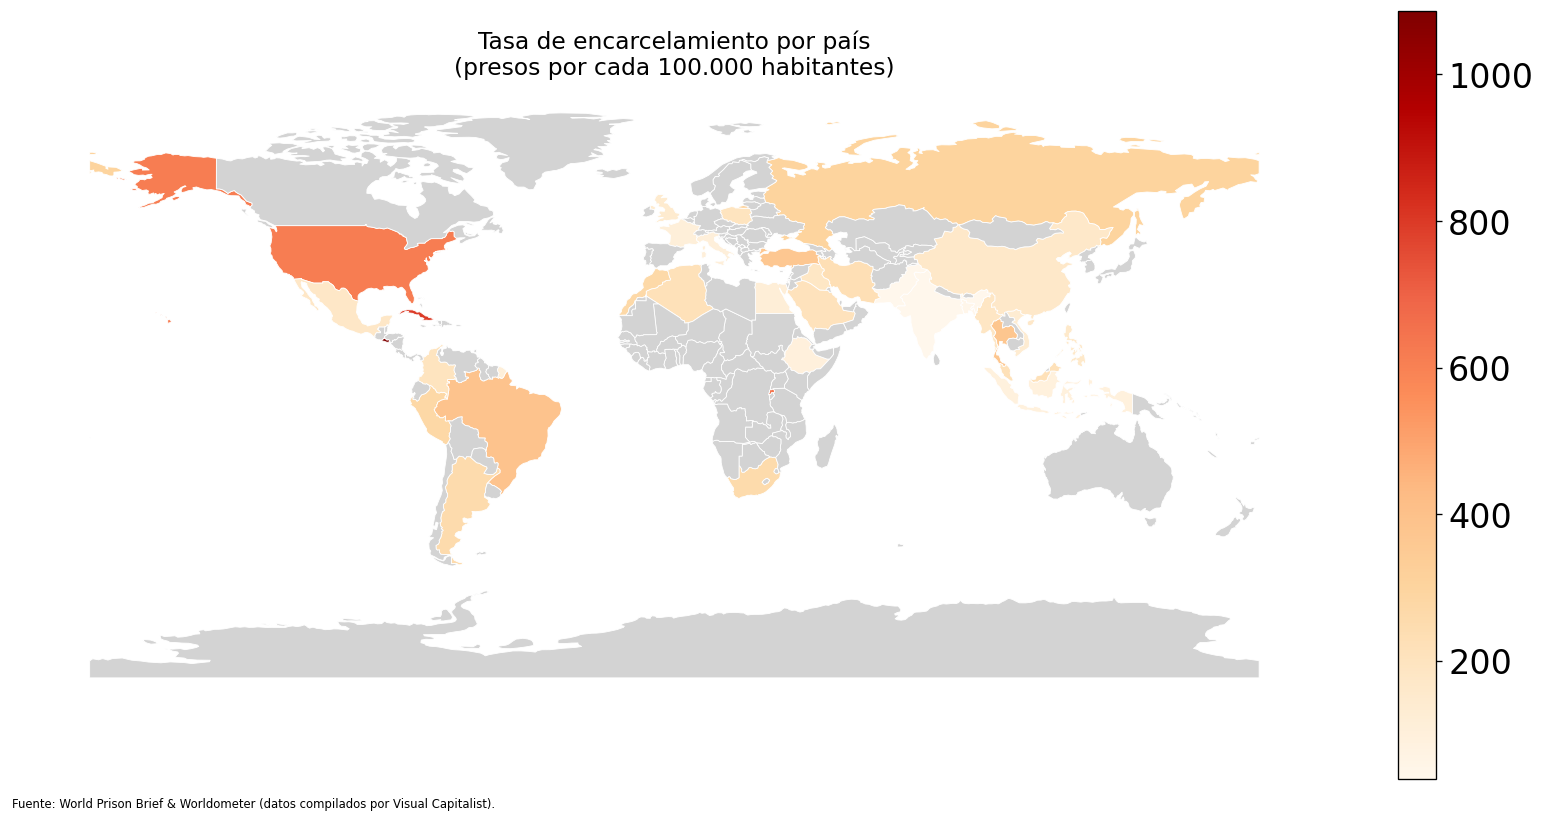

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Reutilizamos df del bloque anterior

# Cargar shapefile mundial (Natural Earth incluido en geopandas)
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)


# Armonizar nombres de país si hace falta
name_map = {
    "United States": "United States of America",
    "Türkiye": "Turkey",
}
df["country_for_merge"] = df[country_col].replace(name_map)

# Unir datos tabulares (df) con geometría (world)
gdf = world.merge(
    df,
    left_on="NAME",
    right_on="country_for_merge",
    how="left"
)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Mapa coroplético de la tasa por 100k
gdf.plot(
    column=rate_col,
    cmap="OrRd",             # paleta secuencial
    linewidth=0.5,
    edgecolor="white",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
    ax=ax
)

ax.set_title(
    "Tasa de encarcelamiento por país\n(presos por cada 100.000 habitantes)",
    fontsize=14
)
ax.set_axis_off()

fig.text(
    0.01, 0.01,
    "Fuente: World Prison Brief & Worldometer (datos compilados por Visual Capitalist).",
    ha="left",
    fontsize=7
)

plt.tight_layout()

fig.savefig(
    "mapa_tasa_encarcelamiento.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [9]:
from PIL import Image, ImageDraw, ImageFont

# Cargar las dos imágenes generadas
bar_img = Image.open("grafico_barras_tasa_encarcelamiento.png")
map_img = Image.open("mapa_tasa_encarcelamiento.png")

# Dimensiones base
width = max(bar_img.width, map_img.width) + 100   # margen lateral
header_height = 200
footer_height = 60
gap = 40

total_height = header_height + bar_img.height + gap + map_img.height + footer_height

# Crear lienzo en blanco
infografia = Image.new("RGB", (width, total_height), "white")
draw = ImageDraw.Draw(infografia)

# Intentar usar una fuente decente; si no, default
try:
    font_title = ImageFont.truetype("DejaVuSans-Bold.ttf", 40)
    font_subtitle = ImageFont.truetype("DejaVuSans.ttf", 22)
    font_body = ImageFont.truetype("DejaVuSans.ttf", 18)
    font_footer = ImageFont.truetype("DejaVuSans.ttf", 14)
except:
    font_title = ImageFont.load_default()
    font_subtitle = ImageFont.load_default()
    font_body = ImageFont.load_default()
    font_footer = ImageFont.load_default()

# --- Cabecera ---
title = "¿Dónde es más probable acabar en prisión?"
subtitle = (
    "Comparativa internacional de la tasa de encarcelamiento por 100.000 habitantes\n"
    "y del peso de cada país en la población presa mundial."
)

# Fix: Replace draw.textsize with draw.textbbox and draw.multiline_textbbox
title_bbox = draw.textbbox((0, 0), title, font=font_title)
title_w = title_bbox[2] - title_bbox[0]
title_h = title_bbox[3] - title_bbox[1]

subtitle_bbox = draw.multiline_textbbox((0, 0), subtitle, font=font_subtitle)
subtitle_w = subtitle_bbox[2] - subtitle_bbox[0]
subtitle_h = subtitle_bbox[3] - subtitle_bbox[1]

title_x = (width - title_w) // 2
title_y = 30
subtitle_x = (width - subtitle_w) // 2
subtitle_y = title_y + title_h + 10

draw.text((title_x, title_y), title, fill="black", font=font_title)
draw.text((subtitle_x, subtitle_y), subtitle, fill="black", font=font_subtitle)

# --- Gráfico de barras ---
bar_x = (width - bar_img.width) // 2
bar_y = header_height
infografia.paste(bar_img, (bar_x, bar_y))

# --- Texto intermedio (lectura guiada) ---
body_text = (
    "El gráfico superior ordena los países por su tasa de encarcelamiento. "
    "La longitud de cada barra muestra cuántas personas hay presas por cada 100.000 habitantes, "
    "mientras que las etiquetas indican cuántas personas hay en prisión en términos absolutos "
    "y qué porcentaje suponen sobre la población presa mundial."
)

# For body text, if you need its dimensions for layout, you'd also use textbbox/multiline_textbbox
# For now, assuming layout works without precise body_text dimensions
body_x = 50
body_y = bar_y + bar_img.height + 10
draw.text((body_x, body_y), body_text, fill="black", font=font_body)

# --- Mapa ---
map_x = (width - map_img.width) // 2
map_y = body_y + 80
infografia.paste(map_img, (map_x, map_y))

# --- Pie de página ---
footer_text = (
    "Visualización elaborada para la asignatura "
    "'Fundamentos de la Visualización para el Análisis de Datos' (UNIR)."
)

# Fix: Replace draw.textsize with draw.textbbox
footer_bbox = draw.textbbox((0, 0), footer_text, font=font_footer)
footer_w = footer_bbox[2] - footer_bbox[0]
footer_h = footer_bbox[3] - footer_bbox[1]

footer_x = (width - footer_w) // 2
footer_y = total_height - footer_height + 15

draw.text((footer_x, footer_y), footer_text, fill="black", font=font_footer)

# Guardar infografía final
infografia.save("infografia_tasa_encarcelamiento.png")

infografia.show()  # en Colab abrirá una previsualización